Surprise Case — CIFAR-10: Animals vs Vehicles (Binary Classification)

Instead of classifying all 10 CIFAR-10 classes, this notebook solves a different problem:
binary classification into two groups:

Vehicles (0): airplane, automobile, ship, truck

Animals (1): bird, cat, deer, dog, frog, horse

In [7]:
import os
import sys
import numpy as np

sys.path.append("..")

from src.data import set_global_seed, load_cifar10
from src.models import build_cnn_small
from src.train import train_model, evaluate_model, get_true_labels
from src.plots import plot_training_history, plot_confusion_matrix

os.makedirs("../screenshots", exist_ok=True)

set_global_seed(42)
print("Setup ready.")

Setup ready.


In [8]:
X_train, X_test, y_train, y_test, class_names = load_cifar10(normalize=True)

y_train_idx = np.argmax(y_train, axis=1)
y_test_idx = np.argmax(y_test, axis=1)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (50000, 32, 32, 3) (50000, 10)
Test shape: (10000, 32, 32, 3) (10000, 10)


In [9]:
# CIFAR-10 class indices:
# 0 airplane, 1 automobile, 2 bird, 3 cat, 4 deer, 5 dog, 6 frog, 7 horse, 8 ship, 9 truck
vehicle_classes = {0, 1, 8, 9}
animal_classes = {2, 3, 4, 5, 6, 7}

def to_binary_label(y_idx: np.ndarray) -> np.ndarray:
    return np.array([0 if int(c) in vehicle_classes else 1 for c in y_idx], dtype=np.int32)

y_train_bin = to_binary_label(y_train_idx)
y_test_bin = to_binary_label(y_test_idx)

# One-hot for Keras (2 classes)
y_train_bin_oh = np.eye(2)[y_train_bin]
y_test_bin_oh = np.eye(2)[y_test_bin]

binary_class_names = ["Vehicle", "Animal"]

print("Binary class counts (train):", np.bincount(y_train_bin))
print("Binary class counts (test):", np.bincount(y_test_bin))

Binary class counts (train): [20000 30000]
Binary class counts (test): [4000 6000]


In [10]:
input_shape = X_train.shape[1:]
num_classes = 2

cnn_bin = build_cnn_small(input_shape=input_shape, num_classes=num_classes)

history = train_model(
    cnn_bin,
    X_train, y_train_bin_oh,
    X_val=X_test, y_val=y_test_bin_oh,
    epochs=8,
    batch_size=64,
    verbose=1
)

Epoch 1/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8852 - loss: 0.2750 - val_accuracy: 0.9156 - val_loss: 0.2103
Epoch 2/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9232 - loss: 0.1942 - val_accuracy: 0.9287 - val_loss: 0.1767
Epoch 3/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9368 - loss: 0.1623 - val_accuracy: 0.9328 - val_loss: 0.1661
Epoch 4/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9459 - loss: 0.1387 - val_accuracy: 0.9320 - val_loss: 0.1689
Epoch 5/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9537 - loss: 0.1208 - val_accuracy: 0.9317 - val_loss: 0.1795
Epoch 6/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9611 - loss: 0.1016 - val_accuracy: 0.9310 - val_loss: 0.1824
Epoch 7/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9663 - loss: 0.0861 - val_accuracy: 0.9328 - val_loss: 0.1914
Epoch 8/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9739 - loss: 0.0701 - val_accuracy: 0.9368 - v

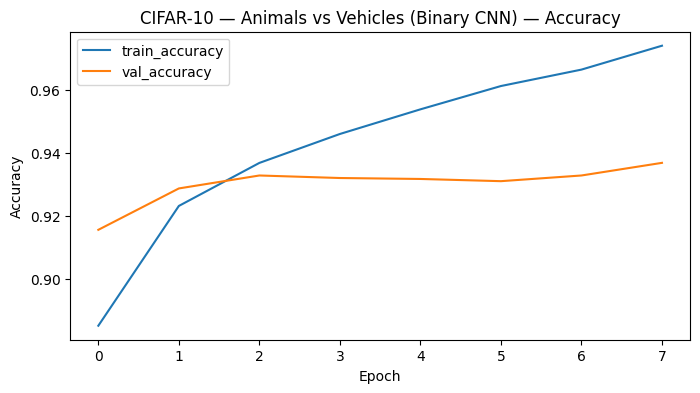

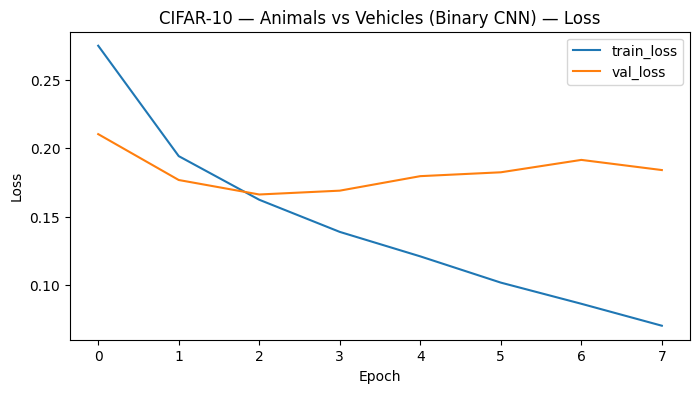

In [11]:
plot_training_history(
    history,
    title="CIFAR-10 — Animals vs Vehicles (Binary CNN)",
    save_path="../screenshots/cifar10_binary_history.png"
)

Binary CNN Accuracy: 0.9368000030517578


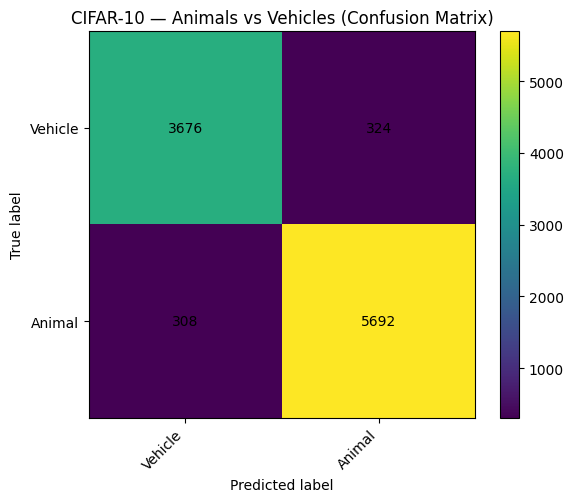

array([[3676,  324],
       [ 308, 5692]])

In [12]:
acc, y_pred = evaluate_model(cnn_bin, X_test, y_test_bin_oh)
print("Binary CNN Accuracy:", acc)

y_true = get_true_labels(y_test_bin_oh)

plot_confusion_matrix(
    y_true=y_true,
    y_pred=y_pred,
    class_names=binary_class_names,
    title="CIFAR-10 — Animals vs Vehicles (Confusion Matrix)",
    save_path="../screenshots/cifar10_binary_cm.png"
)

The binary CNN learns to distinguish animals from vehicles in CIFAR-10 with strong accuracy.
This shows a different and practical use of the same dataset by grouping classes into a real-world binary decision problem.